**California Housing Prices**

In [70]:
import os
# os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' 
# os.environ["TF_XLA_FLAGS"] = "--tf_xla_auto_jit=2 --tf_xla_enable_xla_devices=false"
# os.environ["XLA_FLAGS"] = "--xla_gpu_autotune_level=0"

import pandas as pd
import numpy as np 
import tensorflow as tf
import matplotlib.pyplot as plt 
import seaborn as sns 
from tensorflow.keras.models import Sequential
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import InputLayer,Dense, Normalization
from tensorflow.keras.metrics import RootMeanSquaredError


**Loading and Visualization Dataset**

In [71]:
data=pd.read_csv("housing.csv")
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [72]:
data_header=data.columns
#sns.pairplot(data[data_header],diag_kind="kde")

**Data preparation**

*Data Cleaning*

In [73]:
'''Checking is there any NaN value or not'''
data.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [74]:
data.mean(numeric_only=True)

longitude               -119.569704
latitude                  35.631861
housing_median_age        28.639486
total_rooms             2635.763081
total_bedrooms           537.870553
population              1425.476744
households               499.539680
median_income              3.870671
median_house_value    206855.816909
dtype: float64

In [75]:
'''Filling nan value with mean'''
data=data.fillna(data.mean(numeric_only=True))
data.isna().sum().sum()

np.int64(0)

In [76]:
data.dtypes

longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
median_house_value    float64
ocean_proximity        object
dtype: object

In [77]:
tensor_data=tf.random.shuffle(tf.constant(data.select_dtypes(["float64"])))
tensor_data[:5]

<tf.Tensor: shape=(5, 9), dtype=float64, numpy=
array([[-1.1889e+02,  3.4220e+01,  2.0000e+01,  3.8780e+03,  6.6500e+02,
         1.6510e+03,  5.9100e+02,  5.5402e+00,  2.6460e+05],
       [-1.1839e+02,  3.4010e+01,  3.5000e+01,  4.4240e+03,  9.1800e+02,
         2.1010e+03,  8.8800e+02,  3.9688e+00,  3.5510e+05],
       [-1.1723e+02,  3.2800e+01,  2.7000e+01,  1.2970e+03,  3.5500e+02,
         7.7600e+02,  3.3700e+02,  2.4643e+00,  2.4440e+05],
       [-1.1797e+02,  3.3780e+01,  3.5000e+01,  3.1480e+03,  5.9700e+02,
         2.1100e+03,  5.8700e+02,  3.9479e+00,  2.0380e+05],
       [-1.1827e+02,  3.3770e+01,  2.6000e+01,  2.2720e+03,  6.9400e+02,
         2.5670e+03,  5.9500e+02,  1.9964e+00,  1.5060e+05]])>

In [78]:
x=tensor_data[:,:-1]
x.shape

TensorShape([20640, 8])

In [79]:
y=tf.expand_dims(tensor_data[:,-1],1)
y.shape

TensorShape([20640, 1])

*Data Spliting*

In [80]:
TRAIN_RATIO = 0.8
VAL_RATIO = 0.1
TEST_RATIO = 0.1
DATASET_SIZE=len(x)

In [81]:
x_train=x[:int(DATASET_SIZE*TRAIN_RATIO)]
y_train=y[:int(DATASET_SIZE*TRAIN_RATIO)]

In [82]:
x_val=x[int(DATASET_SIZE*TRAIN_RATIO):int(DATASET_SIZE*(TRAIN_RATIO+VAL_RATIO))]
y_val=y[int(DATASET_SIZE*TRAIN_RATIO):int(DATASET_SIZE*(TRAIN_RATIO+VAL_RATIO))]

In [83]:
x_test=x[int(DATASET_SIZE*(TRAIN_RATIO+VAL_RATIO)):]
y_test=y[int(DATASET_SIZE*(TRAIN_RATIO+VAL_RATIO)):]

In [84]:
normalizer=Normalization()
normalizer.adapt(x_train)
#normalizer(x_train)[:5]

**Model Preparation**

In [95]:
model=Sequential([InputLayer(shape=(x_train.shape[1],)),
                  normalizer,
                  Dense(128,activation='relu'),
                  Dense(128,activation='relu'),
                  Dense(128,activation='relu'),
                  Dense(128,activation='relu'),
                  Dense(128,activation='relu'),
                  Dense(128,activation='relu'),
                  Dense(1)
                  ])
# model.summary()
# tf.keras.utils.plot_model(model,"model.png",True)

In [106]:
model.compile(optimizer=Adam(learning_rate=0.001),
              loss=MeanSquaredError(),
              metrics=[RootMeanSquaredError])

**Model Training**

In [107]:
history=model.fit(x_train,y_train,validation_data=(x_val,y_val),epochs=100,verbose=0)

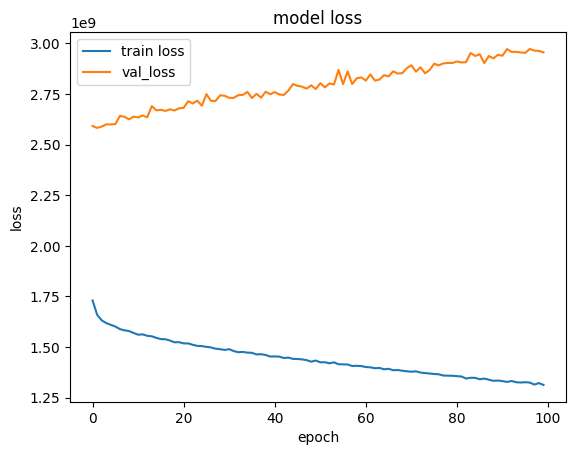

In [108]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title("model loss")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.legend(['train loss','val_loss'])
plt.show()

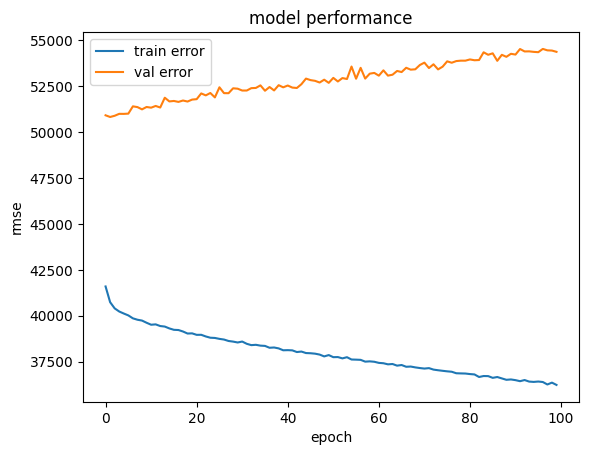

In [109]:
plt.plot(history.history["root_mean_squared_error"])
plt.plot(history.history["val_root_mean_squared_error"])
plt.title("model performance")
plt.xlabel("epoch")
plt.ylabel("rmse")
plt.legend(['train error',"val error"])
plt.show()

In [110]:
model.evaluate(x_test,y_test)

65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 3125244928.0000 - root_mean_squared_error: 55783.5352  


[2951137280.0, 54324.37109375]

In [111]:
y_true = list(y_test[:,0].numpy())
y_pred = list(model.predict(x_test)[:,0])
print(y_true)
print(y_pred)

65/65 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step 
[np.float64(118800.0), np.float64(500001.0), np.float64(65600.0), np.float64(125000.0), np.float64(228100.0), np.float64(148000.0), np.float64(165000.0), np.float64(500001.0), np.float64(172600.0), np.float64(208400.0), np.float64(260300.0), np.float64(259400.0), np.float64(177500.0), np.float64(125700.0), np.float64(123400.0), np.float64(169500.0), np.float64(87500.0), np.float64(73100.0), np.float64(246400.0), np.float64(316200.0), np.float64(153300.0), np.float64(352100.0), np.float64(89300.0), np.float64(414700.0), np.float64(372200.0), np.float64(225900.0), np.float64(369100.0), np.float64(104300.0), np.float64(340300.0), np.float64(170700.0), np.float64(183400.0), np.float64(256700.0), np.float64(162800.0), np.float64(142600.0), np.float64(191400.0), np.float64(411300.0), np.float64(213800.0), np.float64(79000.0), np.float64(93400.0), np.float64(131000.0), np.float64(77100.0), np.float64(383800.0), np.float64(125000.0), np.float64(103000.0)

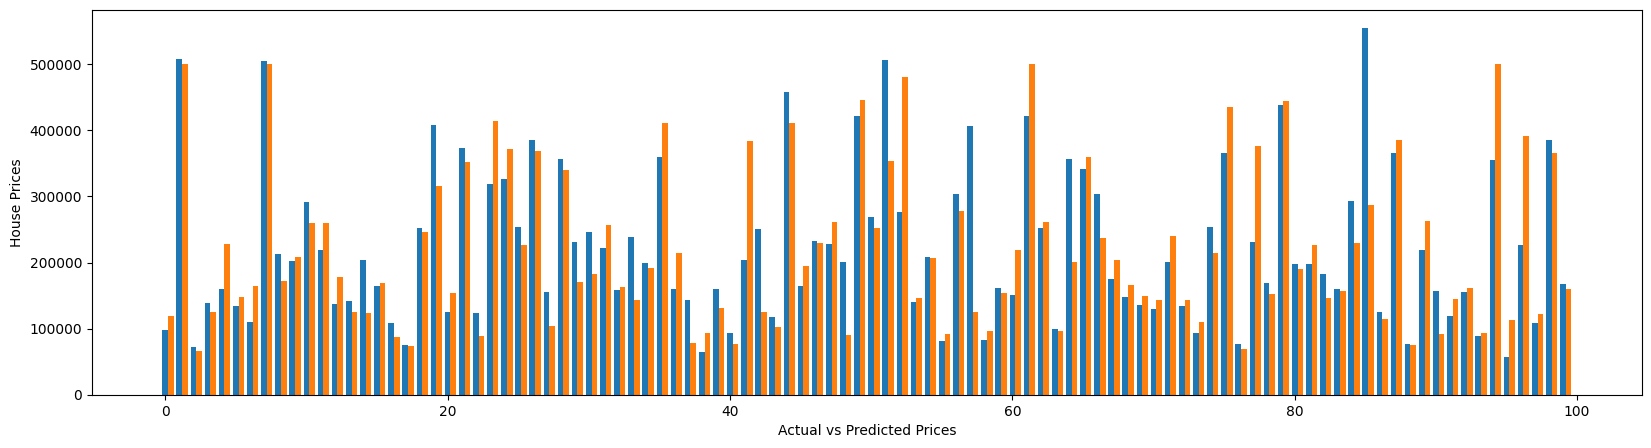

In [113]:
len=100
ind = np.arange(len)
plt.figure(figsize=(20,5))

width = 0.4

plt.bar(ind, y_pred[0:len], width, label='Predicted House Price')
plt.bar(ind + width, y_true[0:len], width, label='Actual House Price')

plt.xlabel('Actual vs Predicted Prices')
plt.ylabel('House Prices')

plt.show()